# Ucitavanje podataka

In [3]:
%pip install sdv
import pandas as pd
import numpy as np
import sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 40.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

## Vizualizacija podataka

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

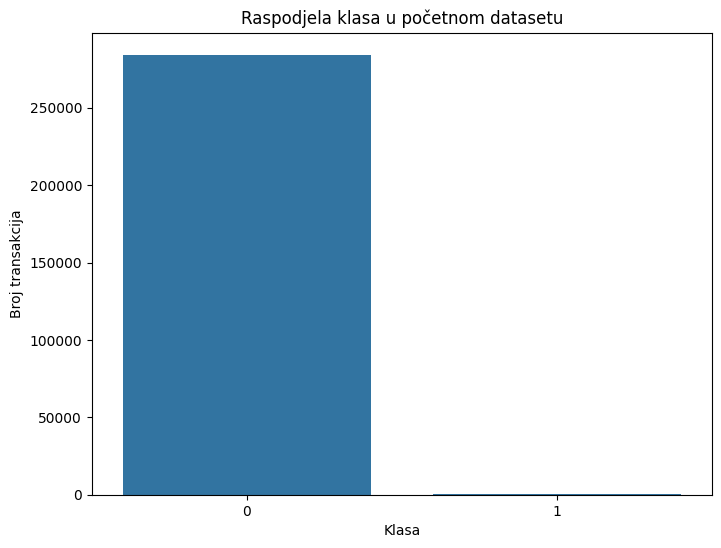

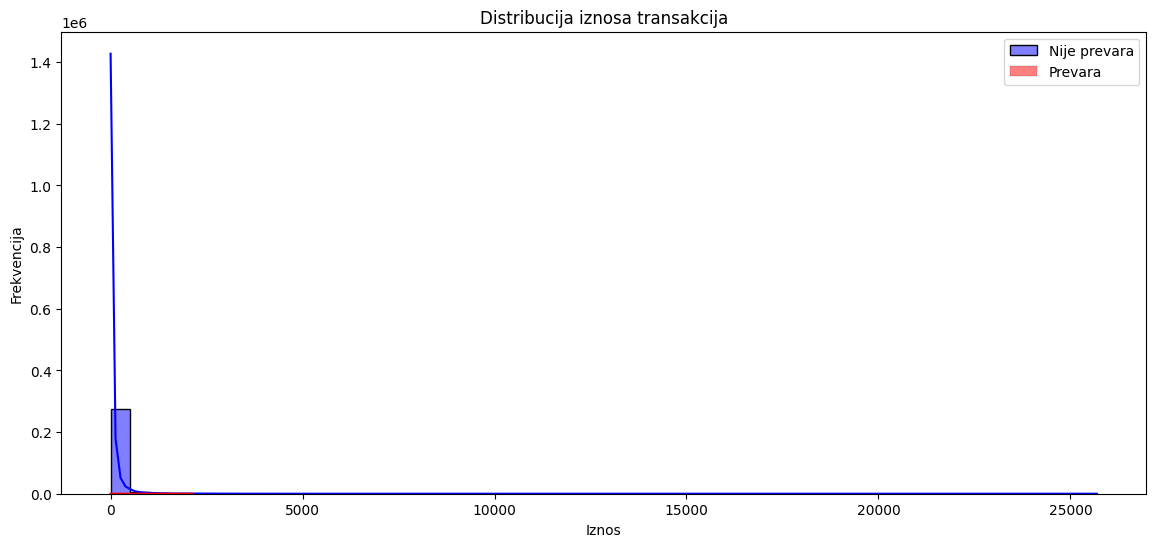

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Raspodjela klasa u početnom datasetu')
plt.xlabel('Klasa')
plt.ylabel('Broj transakcija')
plt.show()

# Distribucija iznosa transakcija
plt.figure(figsize=(14, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', kde=True, label='Nije prevara')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', kde=True, label='Prevara')
plt.legend()
plt.title('Distribucija iznosa transakcija')
plt.xlabel('Iznos')
plt.ylabel('Frekvencija')
plt.show()

#Sintetički model

In [ ]:
from sdv.metadata import SingleTableMetadata
metadata=SingleTableMetadata()
metadata.detect_from_dataframe(df)

In [ ]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(
    metadata,
    enforce_rounding=False,
    epochs=100,
    verbose=True
)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
synthesizer.fit(df)

Gen. (0.00) | Discrim. (0.00):   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-0.64) | Discrim. (-0.28): 100%|██████████| 20/20 [09:08<00:00, 27.41s/it]


## Kreiranje sintetickog dataseta sa balansovanim podacima

---



In [ ]:
import joblib
synthesizer = joblib.load("/content/drive/MyDrive/ctgan_synthesizer.pkl")

In [ ]:
from sdv.sampling import Condition
# Izračunavanje potrebnih vrijednosti za uzorkovanje
total_rows = len(df)
num_fraud = df['Class'].sum()
num_non_fraud = total_rows - num_fraud
target_fraud = total_rows // 2
target_non_fraud = total_rows - target_fraud

# Definiranje uvjeta
fraud_condition = Condition(num_rows=target_fraud, column_values={'Class': 1})
non_fraud_condition = Condition(num_rows=target_non_fraud, column_values={'Class': 0})

# Uzorkovanje sintetičkih podataka
synthetic_fraud_data = synthesizer.sample_from_conditions([fraud_condition])
synthetic_non_fraud_data = synthesizer.sample_from_conditions([non_fraud_condition])

# Spajanje i miješanje sintetičkih podataka
synthetic_data = pd.concat([synthetic_fraud_data, synthetic_non_fraud_data]).reset_index(drop=True)
synthetic_data = synthetic_data.sample(frac=1).reset_index(drop=True)
synthetic_data.to_csv("/content/drive/MyDrive/synthetic_datasetv2", index=False)

Sampling conditions: 100%|██████████| 142404/142404 [00:18<00:00, 7503.38it/s]


In [ ]:
total_rows = len(df)
num_fraud = df['Class'].sum()
num_non_fraud = total_rows - num_fraud
target_fraud = round(total_rows * 0.0017)  # Ciljani broj prevara
target_non_fraud = total_rows - target_fraud

fraud_condition = Condition(num_rows=target_fraud, column_values={'Class': 1})
non_fraud_condition = Condition(num_rows=target_non_fraud, column_values={'Class': 0})

synthetic_fraud_data = synthesizer.sample_from_conditions([fraud_condition])
synthetic_non_fraud_data = synthesizer.sample_from_conditions([non_fraud_condition])

synthetic_data = pd.concat([synthetic_fraud_data, synthetic_non_fraud_data]).reset_index(drop=True)
synthetic_data = synthetic_data.sample(frac=1).reset_index(drop=True)
synthetic_data.to_csv("/content/drive/MyDrive/synthetic_datasetv4", index=False)

Sampling conditions: 100%|██████████| 284323/284323 [00:29<00:00, 9661.68it/s]


In [ ]:
# Učitavanje modela za generiranje sintetičkih podataka
synthesizer = joblib.load('/content/drive/MyDrive/ctgan_synthesizer.pkl')

total_transactions = 284807
num_fraud_samples = total_transactions // 11  # Broj uzoraka sa prevarama
num_non_fraud_samples = num_fraud_samples * 10  # Deset puta više uzoraka bez prevara

fraud_condition = Condition(num_rows=num_fraud_samples, column_values={'Class': 1})
non_fraud_condition = Condition(num_rows=num_non_fraud_samples, column_values={'Class': 0})

synthetic_fraud_data = synthesizer.sample_from_conditions([fraud_condition])
synthetic_non_fraud_data = synthesizer.sample_from_conditions([non_fraud_condition])

synthetic_data = pd.concat([synthetic_fraud_data, synthetic_non_fraud_data]).reset_index(drop=True)
synthetic_data = synthetic_data.sample(frac=1).reset_index(drop=True)  # Miješanje podataka
synthetic_data.to_csv('/content/drive/MyDrive/synthetic_data_10_1_ratio.csv', index=False)  # Spremanje u CSV datoteku

class_counts = synthetic_data['Class'].value_counts()
print(class_counts)


Sampling conditions: 100%|██████████| 258910/258910 [00:30<00:00, 8589.51it/s]


Class
0    258910
1     25891
Name: count, dtype: int64


In [ ]:
from sdv.sampling import Condition

total_rows = len(df)
num_fraud = df['Class'].sum()
num_non_fraud = total_rows - num_fraud
target_fraud = round(total_rows * 0.0017)
target_non_fraud = total_rows - target_fraud

fraud_condition = Condition(num_rows=target_fraud, column_values={'Class': 1})
non_fraud_condition = Condition(num_rows=target_non_fraud, column_values={'Class': 0})

synthetic_fraud_data = synthesizer.sample_from_conditions([fraud_condition])
synthetic_non_fraud_data = synthesizer.sample_from_conditions([non_fraud_condition])

synthetic_data = pd.concat([synthetic_fraud_data, synthetic_non_fraud_data]).reset_index(drop=True)
synthetic_data = synthetic_data.sample(frac=1).reset_index(drop=True)
synthetic_data.to_csv("/content/drive/MyDrive/synthetic_datasetv4", index=False)  # Spremanje u CSV datoteku


Sampling conditions: 100%|██████████| 284323/284323 [00:46<00:00, 6166.70it/s]


In [9]:
dfv1 =  pd.read_csv("/content/drive/MyDrive/synthetic_datasetv1")
dfv2 =  pd.read_csv("/content/drive/MyDrive/synthetic_datasetv2")
dfv3 = pd.read_csv("/content/drive/MyDrive/synthetic_data_10_1_ratio.csv")
dfv4 = pd.read_csv("/content/drive/MyDrive/synthetic_datasetv4")


In [ ]:
def plot_distribution(data, title, filename):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Class', data=data)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
    plt.savefig(filename)
    plt.show()


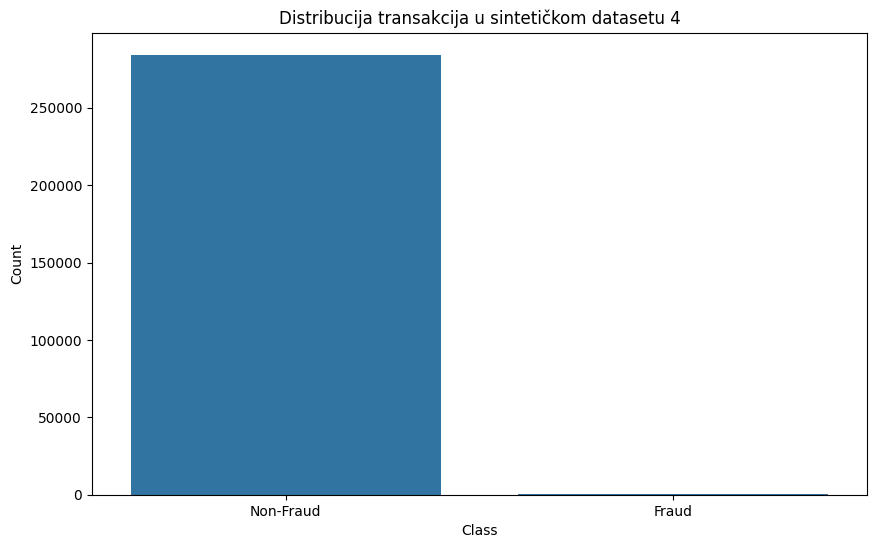

In [ ]:
plot_distribution(dfv4, 'Distribucija transakcija u sintetičkom datasetu 4', 'dfv4.png')


test

In [ ]:
class_counts=dfv1['Class'].value_counts()
print(class_counts)

Class
0    284323
1       484
Name: count, dtype: int64


In [ ]:
class_counts=dfv2['Class'].value_counts()
print(class_counts)

Class
0    142404
1    142403
Name: count, dtype: int64


In [ ]:
class_counts=dfv3['Class'].value_counts()
print(class_counts)

Class
0    258910
1     25891
Name: count, dtype: int64


In [ ]:
class_counts=dfv4['Class'].value_counts()
print(class_counts)

Class
0    284323
1       484
Name: count, dtype: int64


# Evaluacija sintetičkih podataka

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=dfv1,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:07<00:00,  4.23it/s]|
Column Shapes Score: 94.48%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:18<00:00,  5.90it/s]|
Column Pair Trends Score: 93.91%

Overall Score (Average): 94.2%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=dfv2,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:03<00:00,  7.99it/s]|
Column Shapes Score: 80.47%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:10<00:00,  6.56it/s]|
Column Pair Trends Score: 86.65%

Overall Score (Average): 83.56%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=dfv3,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:08<00:00,  3.53it/s]|
Column Shapes Score: 93.89%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:26<00:00,  5.39it/s]|
Column Pair Trends Score: 90.26%

Overall Score (Average): 92.08%



In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=dfv4,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 31/31 [00:12<00:00,  2.42it/s]|
Column Shapes Score: 94.46%

(2/2) Evaluating Column Pair Trends: |██████████| 465/465 [01:28<00:00,  5.23it/s]|
Column Pair Trends Score: 93.92%

Overall Score (Average): 94.19%



In [ ]:
from sdv.evaluation.single_table import get_column_plot
import matplotlib.pyplot as plt

fig = get_column_plot(
    real_data=df,
    synthetic_data=dfv2,
    metadata=metadata,
    column_name='Class'
)
fig.show()

In [ ]:
from sdv.evaluation.single_table import get_column_plot
import matplotlib.pyplot as plt

fig = get_column_plot(
    real_data=df,
    synthetic_data=dfv3,
    metadata=metadata,
    column_name='Class'
)
fig.show()

#Treniranje i testiranje modela

## Mergeovanje

In [10]:
merged_data  = pd.concat([df, dfv2], ignore_index=True)
merged_data = merged_data.sample(frac=1).reset_index(drop=True)
merged_data2  = pd.concat([df, dfv1], ignore_index=True)
merged_data2 = merged_data2.sample(frac=1).reset_index(drop=True)
merged_data3 = pd.concat([df, dfv3], ignore_index=True)
merged_data3 = merged_data3.sample(frac=1).reset_index(drop=True)

In [ ]:
class_counts=merged_data['Class'].value_counts()
print(class_counts)
class_counts=merged_data2['Class'].value_counts()
print(class_counts)
class_counts=merged_data3['Class'].value_counts()
print(class_counts)


Class
0    426719
1    142895
Name: count, dtype: int64
Class
0    568638
1       976
Name: count, dtype: int64
Class
0    543225
1     26383
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot za Merged_data
plot_distribution(merged_data, 'Distribucija transakcija u Kombinovanom datasetu 1', 'Merged_data_distribution.png')

# Plot za Merged_data2
plot_distribution(merged_data2, 'Distribucija transakcija u Kombinovanom datasetu 2', 'Merged_data2_distribution.png')

# Plot za Merged_data3
plot_distribution(merged_data3, 'Distribucija transakcija u Kombinovanom datasetu 3', 'Merged_data3_distribution.png')


###Evaluate and plot funkcija

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score

def evaluate_and_plot_model(y_val, y_probs, model_name):
    # Precision-Recall kriva
    precision, recall, _ = precision_recall_curve(y_val, y_probs)
    auprc = auc(recall, precision)
    print(f'Area Under the Precision-Recall Curve (AUPRC) for {model_name}: {auprc:.4f}')

    # ROC kriva
    fpr, tpr, _ = roc_curve(y_val, y_probs)
    roc_auc = roc_auc_score(y_val, y_probs)
    print(f'Area Under the ROC Curve (ROC-AUC) for {model_name}: {roc_auc:.4f}')

    # Plot Precision-Recall kriva
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUPRC = {auprc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend()
    plt.show()

    # Plot ROC kriva
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (ROC-AUC = {roc_auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()


##Logisticka regresija

###Logisticka regresija real

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


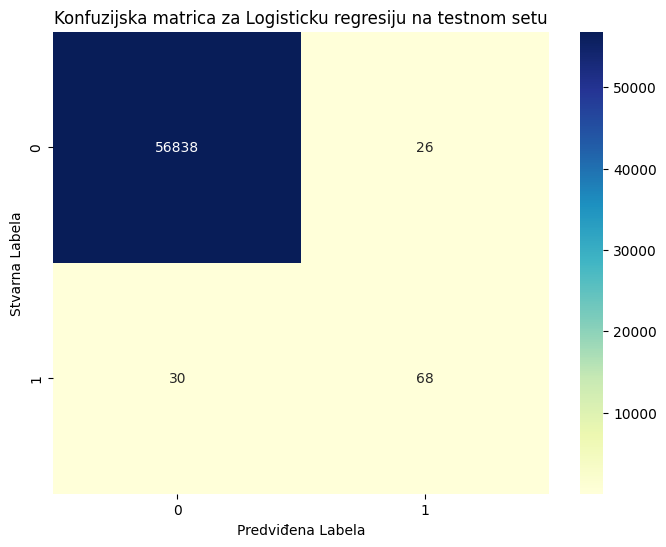

	Izvještaj Klasifikacije za testni set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00     56864
	       Fraud       0.72      0.69      0.71        98
	
	    accuracy                           1.00     56962
	   macro avg       0.86      0.85      0.85     56962
	weighted avg       1.00      1.00      1.00     56962
	
Area Under the Precision-Recall Curve (AUPRC) for Logisticka regresija: 0.5939
Area Under the ROC Curve (ROC-AUC) for Logisticka regresija: 0.9024


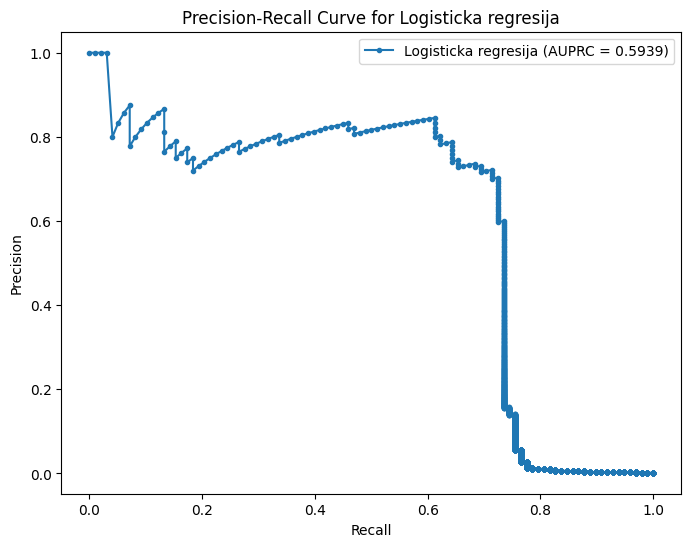

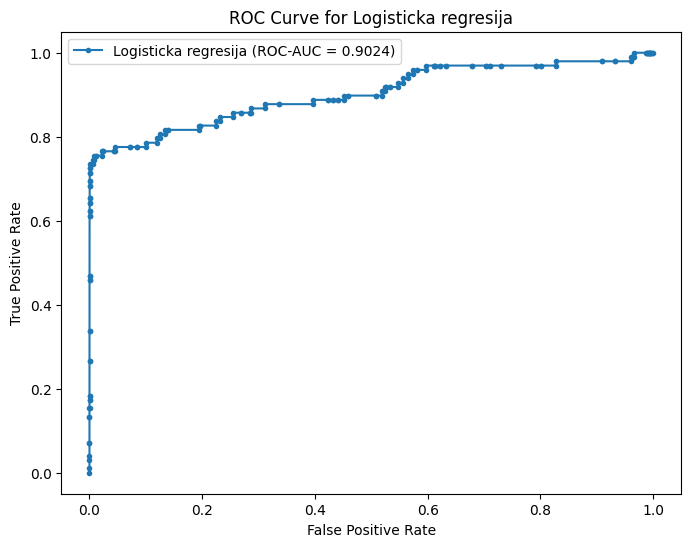

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np

x = df.drop(columns=['Class']).values
y = df['Class'].values

# Podjela na trening i test set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje pomocu logisticke regresije
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

# Spasavanje modela u pickle fajl
joblib_file = "lr_realmodel.pkl"
joblib.dump(lr_model, joblib_file)

# Predikcija na testnom setu
y_pred_lr = lr_model.predict(x_val)
cnf_matrix_lr = confusion_matrix(y_val, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Logisticku regresiju na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lr, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)
y_probs_lr = lr_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lr, 'Logisticka regresija')


###Logisticka regresija Merged_data


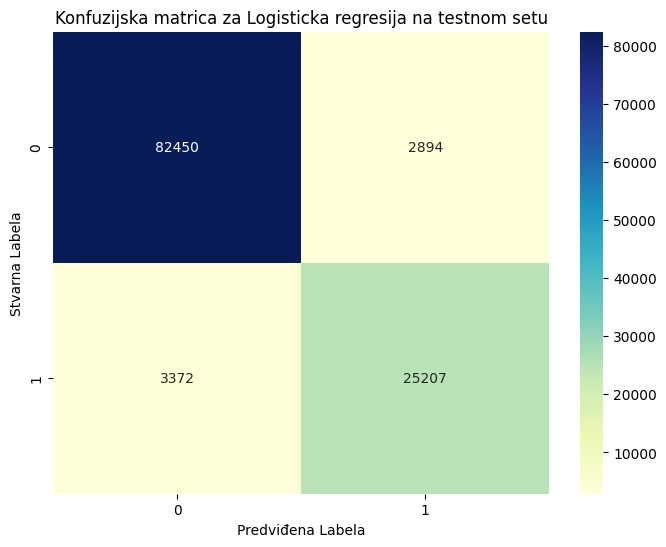

	Izvještaj Klasifikacije za testni set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.96      0.97      0.96     85344
	       Fraud       0.90      0.88      0.89     28579
	
	    accuracy                           0.94    113923
	   macro avg       0.93      0.92      0.93    113923
	weighted avg       0.94      0.94      0.94    113923
	
Area Under the Precision-Recall Curve (AUPRC) for Logistička Regresija: 0.9432
Area Under the ROC Curve (ROC-AUC) for Logistička Regresija: 0.9643


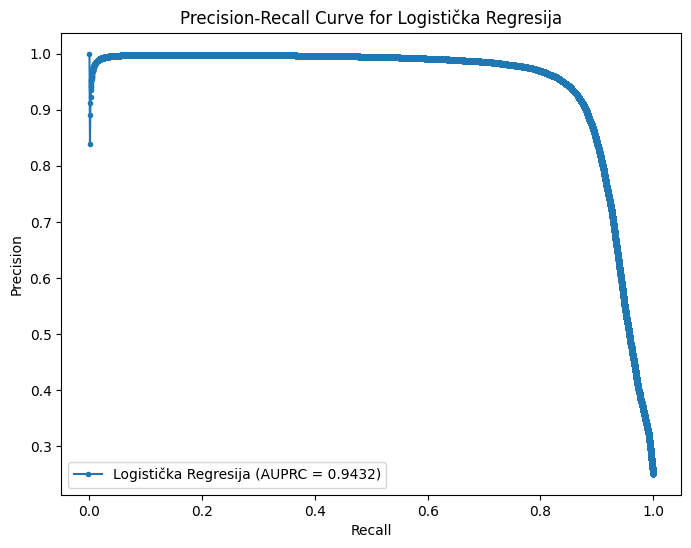

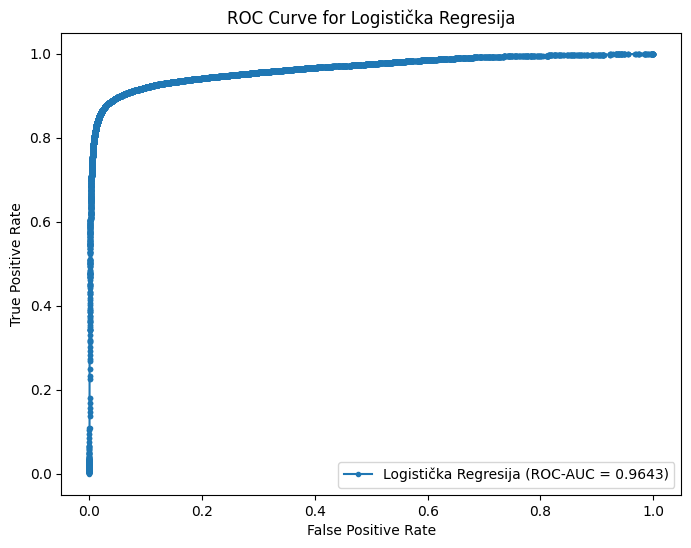

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import numpy as np

x = merged_data.drop(columns=['Class']).values
y = merged_data['Class'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

joblib_file = "lr_model.pkl"
joblib.dump(lr_model, joblib_file)

y_pred_lr = lr_model.predict(x_val)

cnf_matrix_lr = confusion_matrix(y_val, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Logisticka regresija na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lr, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

y_probs_lr = lr_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lr, 'Logistička Regresija')


###Logisticka regresija merged_data2

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


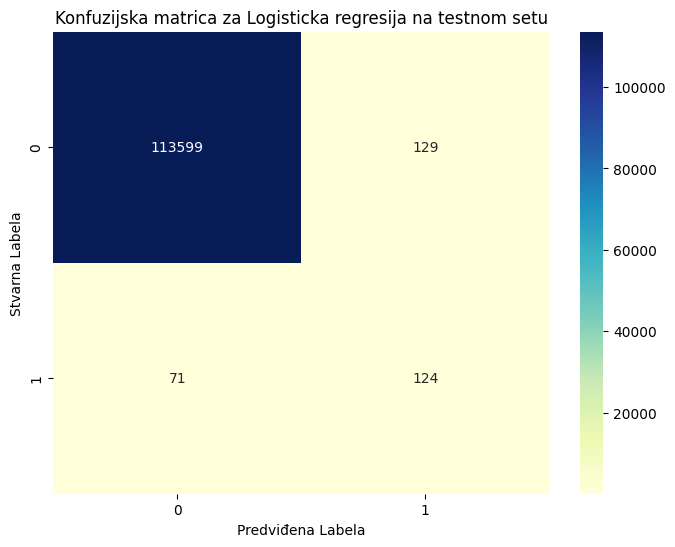

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    113728
	       Fraud       0.49      0.64      0.55       195
	
	    accuracy                           1.00    113923
	   macro avg       0.74      0.82      0.78    113923
	weighted avg       1.00      1.00      1.00    113923
	
Area Under the Precision-Recall Curve (AUPRC) for Logistička Regresija: 0.5779
Area Under the ROC Curve (ROC-AUC) for Logistička Regresija: 0.8980


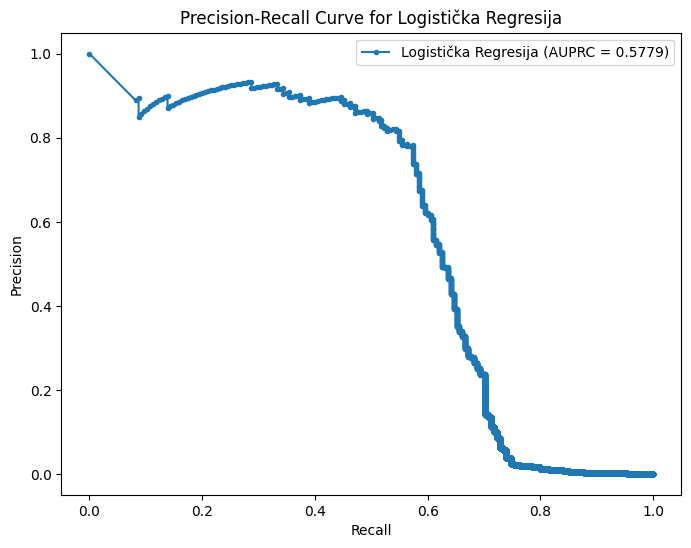

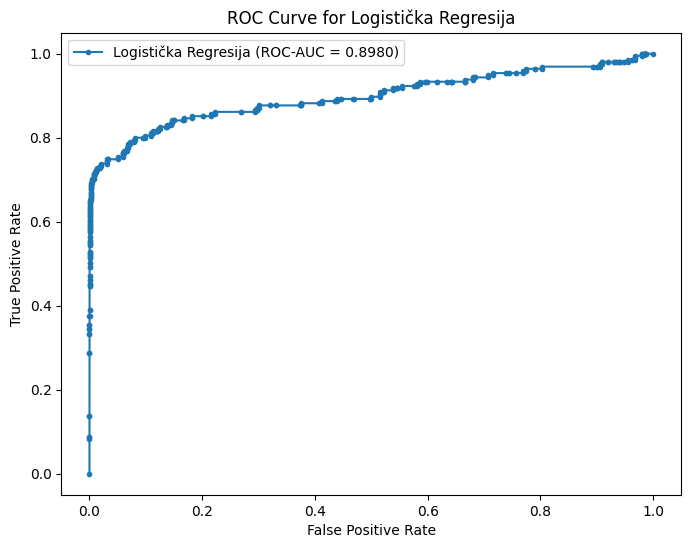

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import numpy as np

x = merged_data2.drop(columns=['Class']).values
y = merged_data2['Class'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

joblib_file = "lr_model2.pkl"
joblib.dump(lr_model, joblib_file)

y_pred_lr = lr_model.predict(x_val)

cnf_matrix_lr = confusion_matrix(y_val, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Logisticka regresija na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lr, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)

y_probs_lr = lr_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lr, 'Logistička Regresija')


###Logisticka regresija merged_data3

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


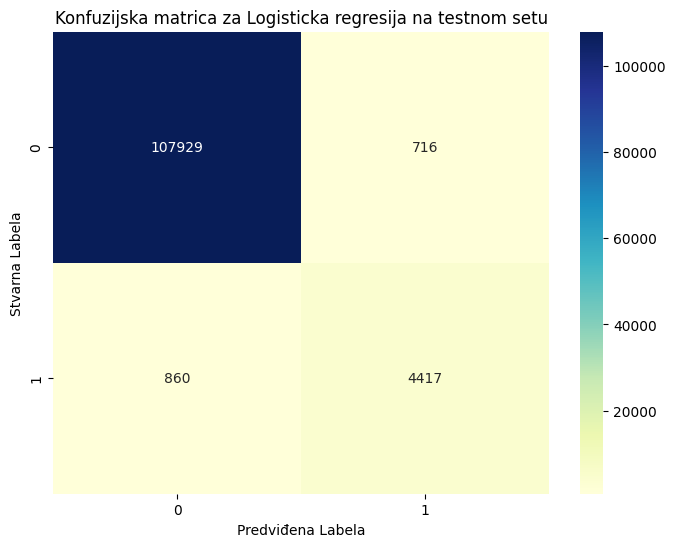

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.99      0.99      0.99    108645
	       Fraud       0.86      0.84      0.85      5277
	
	    accuracy                           0.99    113922
	   macro avg       0.93      0.92      0.92    113922
	weighted avg       0.99      0.99      0.99    113922
	
Area Under the Precision-Recall Curve (AUPRC) for Logistička Regresija: 0.8827
Area Under the ROC Curve (ROC-AUC) for Logistička Regresija: 0.9683


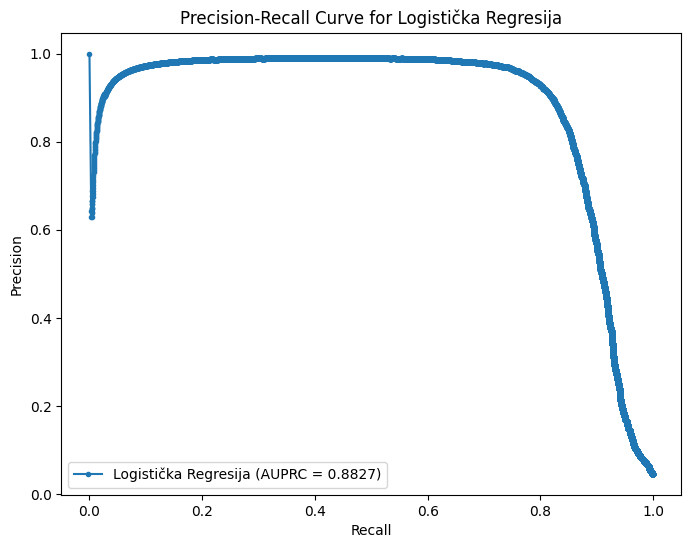

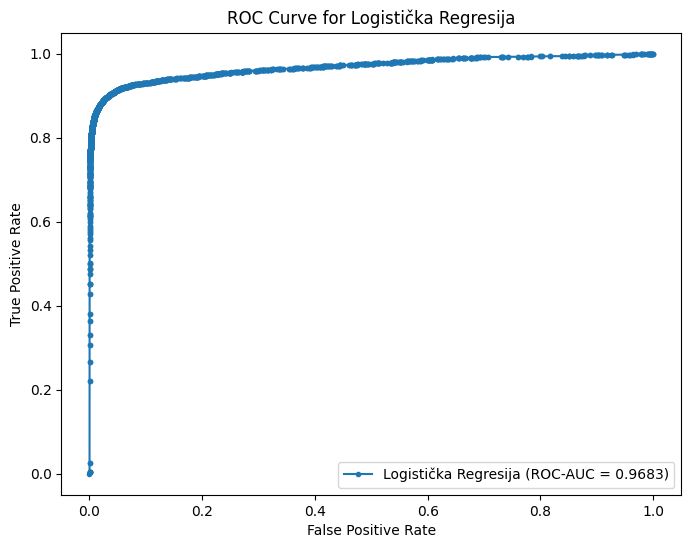

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import numpy as np


x = merged_data3.drop(columns=['Class']).values
y = merged_data3['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)


lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

joblib_file = "lr_model3.pkl"
joblib.dump(lr_model, joblib_file)

y_pred_lr = lr_model.predict(x_val)

cnf_matrix_lr = confusion_matrix(y_val, y_pred_lr)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Logisticka regresija na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lr, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_lr = lr_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lr, 'Logistička Regresija')


##Random Forest Classifier

###RFC Real

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np


x = df.drop(columns=['Class']).values
y = df['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)


rfc_model = RandomForestClassifier()  # Prilagodba težina prema potrebi
rfc_model.fit(x_train, y_train.ravel())


joblib_file = "rfc_realmodel.pkl"
joblib.dump(rfc_model, joblib_file)


y_pred_rfc = rfc_model.predict(x_val)
cnf_matrix_rfc = confusion_matrix(y_val, y_pred_rfc)

sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za RandomForestClassifier na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_rfc, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

y_probs_rfc = rfc_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_rfc, 'RandomForestClassifier')


KeyboardInterrupt: 

###RFC Merged_data

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = merged_data.drop(columns=['Class']).values
y = merged_data['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

joblib_file = "rfc_model.pkl"
joblib.dump(rfc_model, joblib_file)

y_pred_rfc = rfc_model.predict(x_val)

cnf_matrix_rfc = confusion_matrix(y_val, y_pred_rfc)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za RandomForestClassifier na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_rfc, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_rfc = rfc_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_rfc, 'Random Forest Classifier')


###RFC Merged_data2

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = merged_data2.drop(columns=['Class']).values
y = merged_data2['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje RandomForestClassifier modela
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

# Spašavanje modela u datoteku
joblib_file = "rfc_model2.pkl"
joblib.dump(rfc_model, joblib_file)

# Predikcija na testnom setu
y_pred_rfc = rfc_model.predict(x_val)

# Izračun konfuzijske matrice
cnf_matrix_rfc = confusion_matrix(y_val, y_pred_rfc)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za RandomForestClassifier na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_rfc, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_rfc = rfc_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_rfc, 'Random Forest Classifier')


###RFC Merged_data3

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = merged_data3.drop(columns=['Class']).values
y = merged_data3['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)

joblib_file = "rfc_model3.pkl"
joblib.dump(rfc_model, joblib_file)

y_pred_rfc = rfc_model.predict(x_val)

cnf_matrix_rfc = confusion_matrix(y_val, y_pred_rfc)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_rfc), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za RandomForestClassifier na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_rfc, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_rfc = rfc_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_rfc, 'Random Forest Classifier')


##XGB

###XGB Real

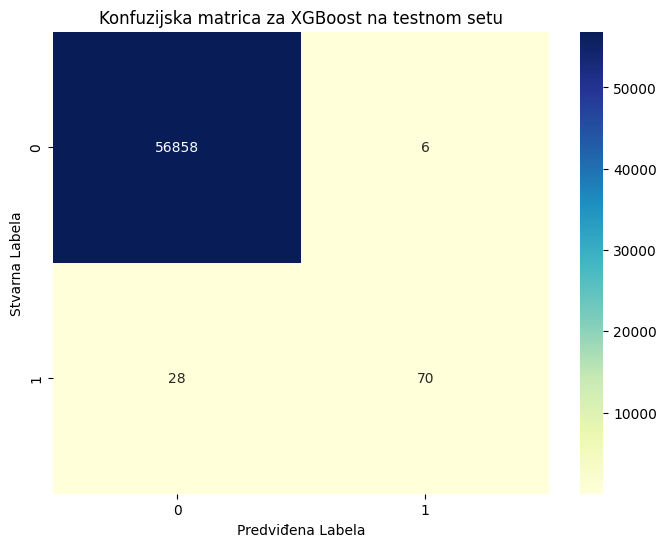

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00     56864
	       Fraud       0.92      0.71      0.80        98
	
	    accuracy                           1.00     56962
	   macro avg       0.96      0.86      0.90     56962
	weighted avg       1.00      1.00      1.00     56962
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost: 0.8358
Area Under the ROC Curve (ROC-AUC) for XGBoost: 0.9744


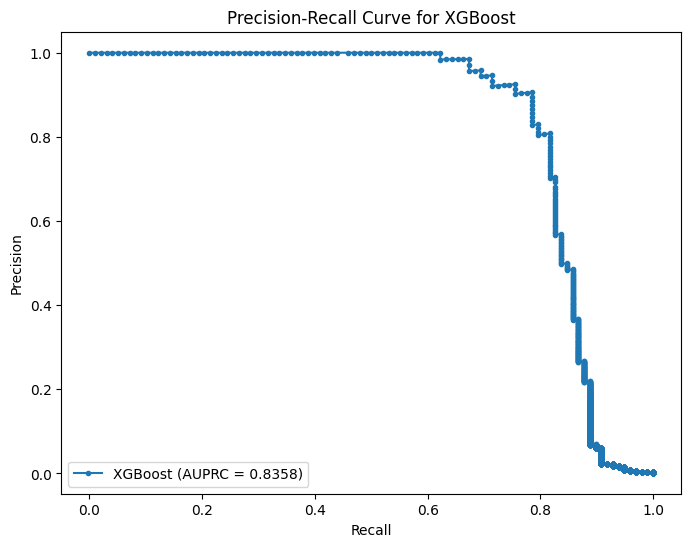

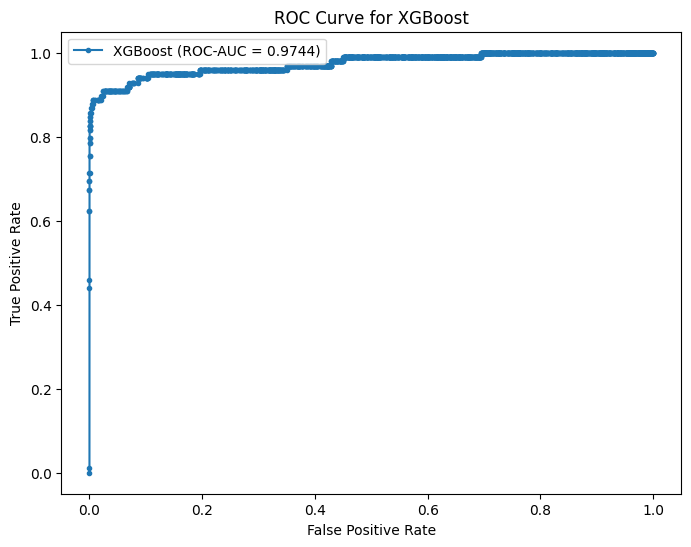

In [19]:
import xgboost as xgb


x = df.drop(columns=['Class']).values
y = df['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje XGBoost modela
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

joblib_file = "xgb_realmodel.pkl"
joblib.dump(xgb_model, joblib_file)

# Predikcija na testnom setu
y_pred_xgb = xgb_model.predict(x_val)

# Izračun konfuzijske matrice
cnf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBoost na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_xgb = xgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_xgb, 'XGBoost')


###XGB Merged

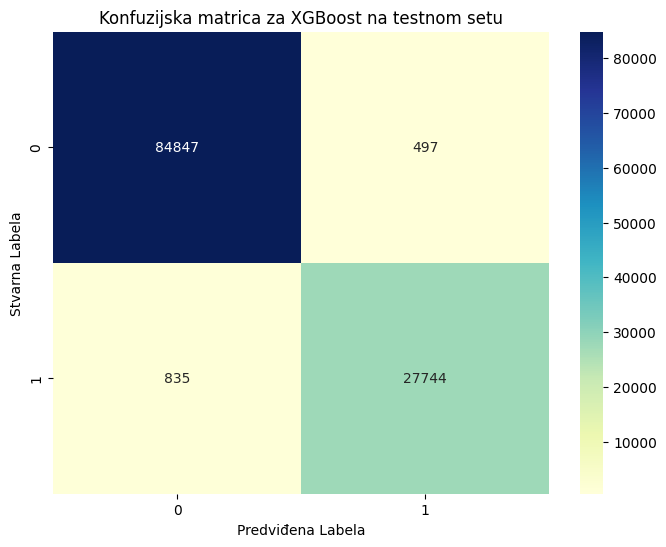

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.99      0.99      0.99     85344
	       Fraud       0.98      0.97      0.98     28579
	
	    accuracy                           0.99    113923
	   macro avg       0.99      0.98      0.98    113923
	weighted avg       0.99      0.99      0.99    113923
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost: 0.9966
Area Under the ROC Curve (ROC-AUC) for XGBoost: 0.9985


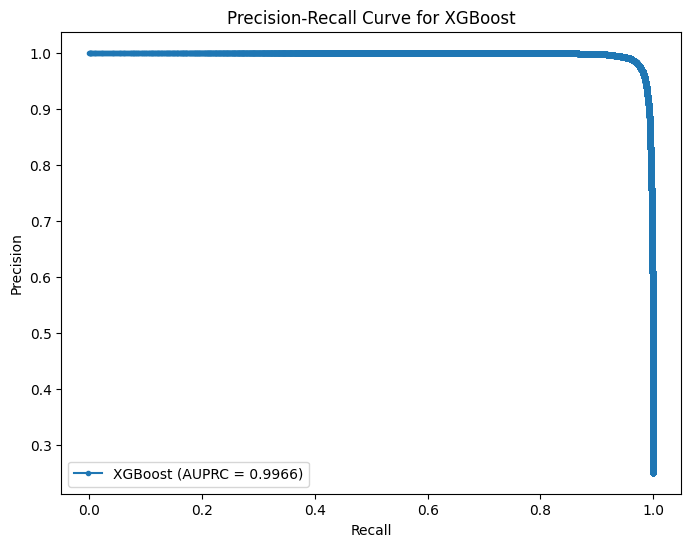

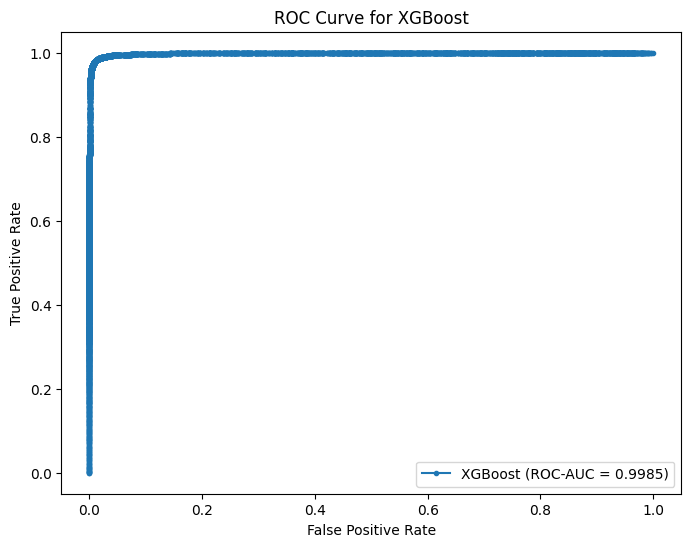

In [20]:
import xgboost as xgb


x = merged_data.drop(columns=['Class']).values
y = merged_data['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

joblib_file = "xgb_model.pkl"
joblib.dump(xgb_model, joblib_file)

y_pred_xgb = xgb_model.predict(x_val)

cnf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBoost na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_xgb = xgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_xgb, 'XGBoost')


###XGB Merged_data2

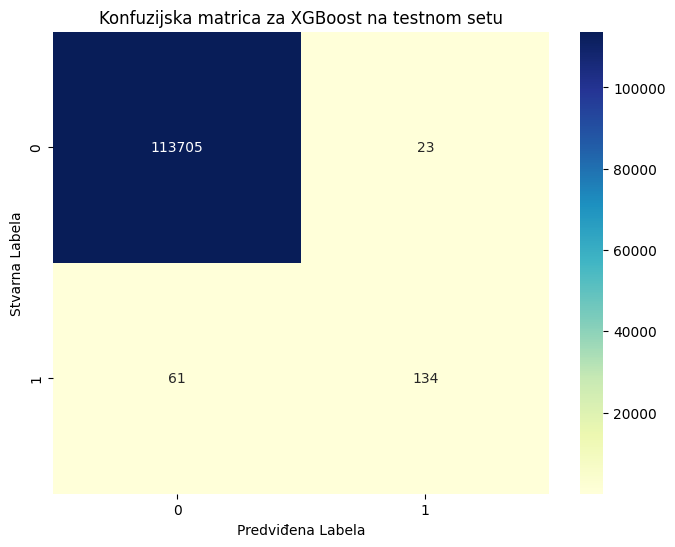

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    113728
	       Fraud       0.85      0.69      0.76       195
	
	    accuracy                           1.00    113923
	   macro avg       0.93      0.84      0.88    113923
	weighted avg       1.00      1.00      1.00    113923
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost: 0.8328
Area Under the ROC Curve (ROC-AUC) for XGBoost: 0.9948


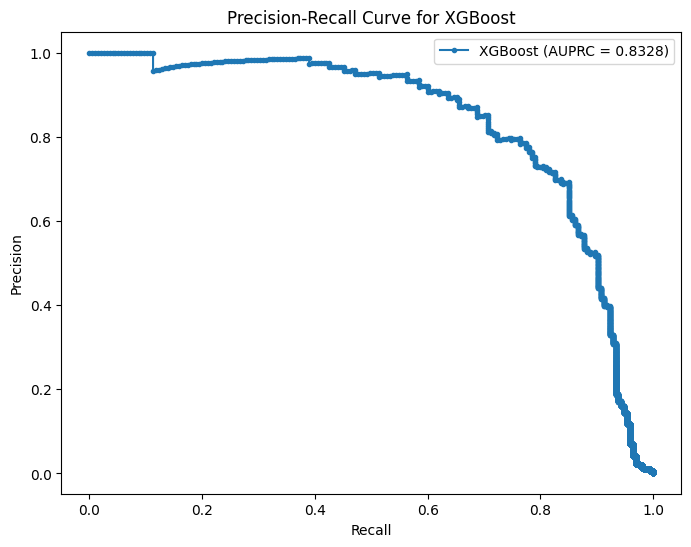

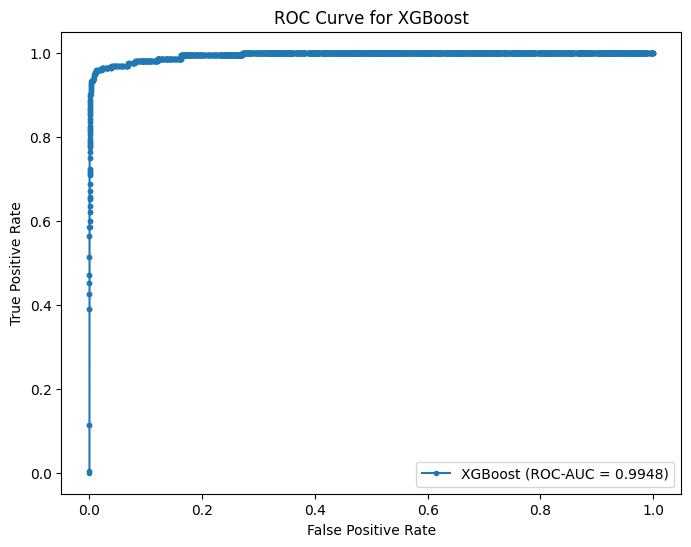

In [21]:
import xgboost as xgb


x = merged_data2.drop(columns=['Class']).values
y = merged_data2['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

joblib_file = "xgb_model2.pkl"
joblib.dump(xgb_model, joblib_file)

y_pred_xgb = xgb_model.predict(x_val)

cnf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBoost na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_xgb = xgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_xgb, 'XGBoost')


###XGB Merged_data3

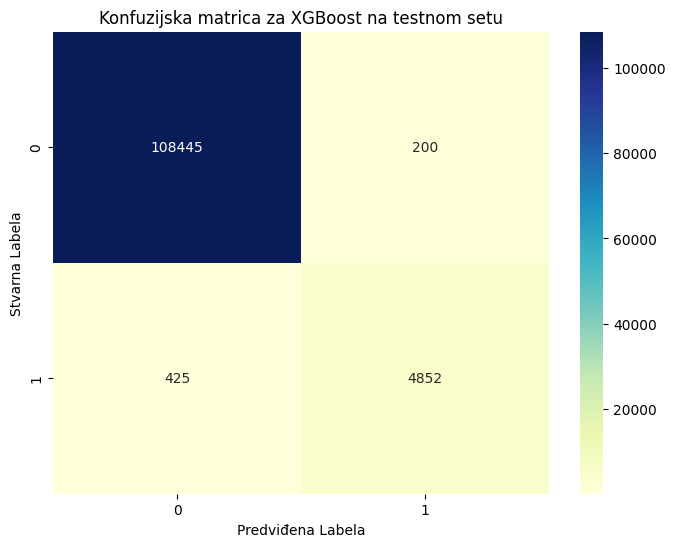

	Izvještaj Klasifikacije za testni Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    108645
	       Fraud       0.96      0.92      0.94      5277
	
	    accuracy                           0.99    113922
	   macro avg       0.98      0.96      0.97    113922
	weighted avg       0.99      0.99      0.99    113922
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost: 0.9785
Area Under the ROC Curve (ROC-AUC) for XGBoost: 0.9973


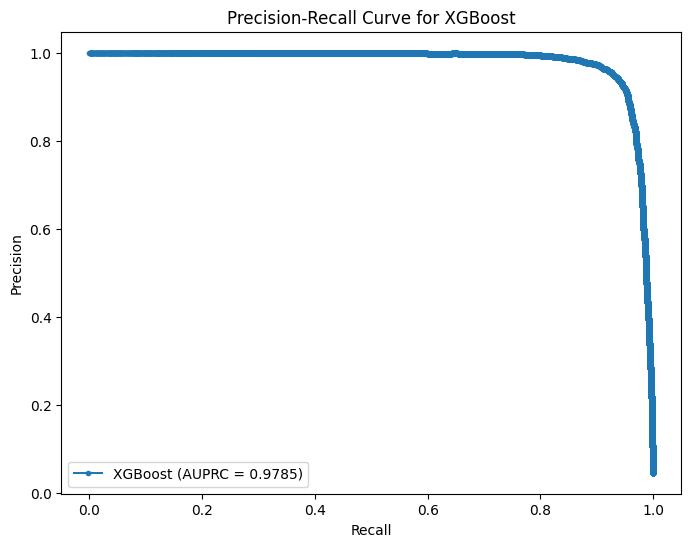

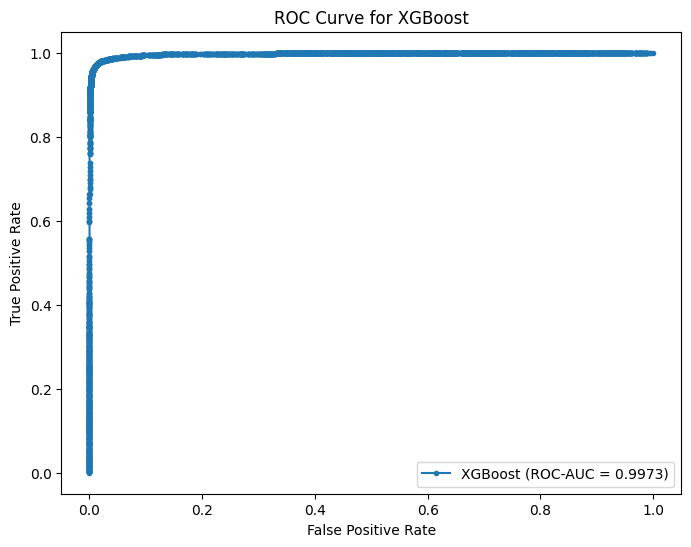

In [29]:
import xgboost as xgb


x = merged_data3.drop(columns=['Class']).values
y = merged_data3['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

joblib_file = "xgb_model3.pkl"
joblib.dump(xgb_model, joblib_file)

y_pred_xgb = xgb_model.predict(x_val)

cnf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)


plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBoost na testnom setu')
plt.show()


classification_report_str = classification_report(y_val, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni Set")
print(indented_classification_report)


y_probs_xgb = xgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_xgb, 'XGBoost')


###XGB Test na dfv4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

# Učitavanje željenog testnog seta podataka
x_real = dfv4.drop(columns=['Class']).values
y_real = dfv4['Class'].values


x_train, x_test, y_train, y_test = train_test_split(x_real, y_real, test_size=0.2, random_state=42, stratify=y_real)

model = joblib.load("xgb_model.pkl")

y_pred = model.predict(x_test)
y_probs = model.predict_proba(x_test)[:, 1]

cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBoost na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_test, y_pred, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

precision, recall, _ = precision_recall_curve(y_test, y_probs)
auprc = auc(recall, precision)
print(f'Površina ispod Precision-Recall kriveUPRC) za testni set: {auprc:.4f}')

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
print(f'Površina ispod ROC krive (ROC-AUC) za testni set: {roc_auc:.4f}')

evaluate_and_plot_model(y_test, y_probs, title='XGBoost na testnom setu')
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score

# Učitavanje XGBoostReal modela
xgb_model = joblib.load("xgb_realmodel.pkl")


x_test = dfv4.drop(columns=['Class']).values
y_test = dfv4['Class'].values

# Predviđanje na testnom setu
y_pred_xgb = xgb_model.predict(x_test)
y_probs_xgb = xgb_model.predict_proba(x_test)[:, 1]

cnf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBClassifier na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_test, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

precision, recall, _ = precision_recall_curve(y_test, y_probs_xgb)
auprc = auc(recall, precision)
print(f'Površina ispod Precision-Recall krive (AUPRC) za testni set: {auprc:.4f}')

fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
roc_auc = roc_auc_score(y_test, y_probs_xgb)
print(f'Površina ispod ROC krive (ROC-AUC) za testni set: {roc_auc:.4f}')

# Evaluacija i plotiranje koristeći funkciju evaluate_and_plot_model
evaluate_and_plot_model(y_test, y_probs_xgb,'XGBoost na testnom setu')


###XGB Real na dfv4

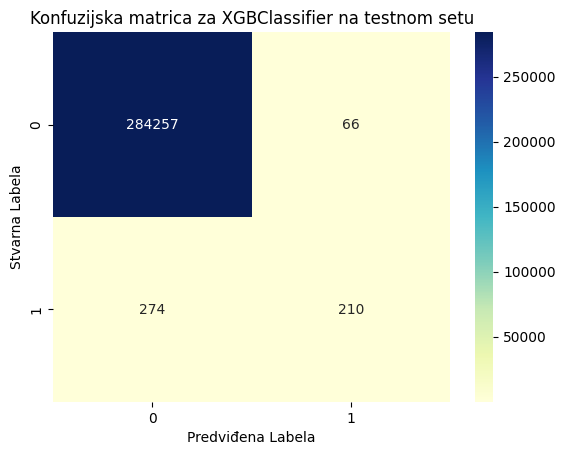

	Izvještaj Klasifikacije za testni set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    284323
	       Fraud       0.76      0.43      0.55       484
	
	    accuracy                           1.00    284807
	   macro avg       0.88      0.72      0.78    284807
	weighted avg       1.00      1.00      1.00    284807
	
Površina ispod Precision-Recall krive (AUPRC) za testni set: 0.5760
Površina ispod ROC krive (ROC-AUC) za testni set: 0.9799


TypeError: evaluate_and_plot_model() got an unexpected keyword argument 'title'

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score

xgb_model = joblib.load("xgb_realmodel.pkl")


x_test = dfv4.drop(columns=['Class']).values
y_test = dfv4['Class'].values

y_pred_xgb = xgb_model.predict(x_test)
y_probs_xgb = xgb_model.predict_proba(x_test)[:, 1]

cnf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(pd.DataFrame(cnf_matrix_xgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za XGBClassifier na testnom setu')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_test, y_pred_xgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)


precision, recall, _ = precision_recall_curve(y_test, y_probs_xgb)
auprc = auc(recall, precision)
print(f'Površina ispod Precision-Recall krive (AUPRC) za testni set: {auprc:.4f}')

fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
roc_auc = roc_auc_score(y_test, y_probs_xgb)
print(f'Površina ispod ROC krive (ROC-AUC) za testni set: {roc_auc:.4f}')

# Evaluacija i plotiranje koristeći funkciju evaluate_and_plot_model
evaluate_and_plot_model(y_test, y_probs_xgb,'XGBoost na testnom setu')


###XGB test na dfv4 3:1

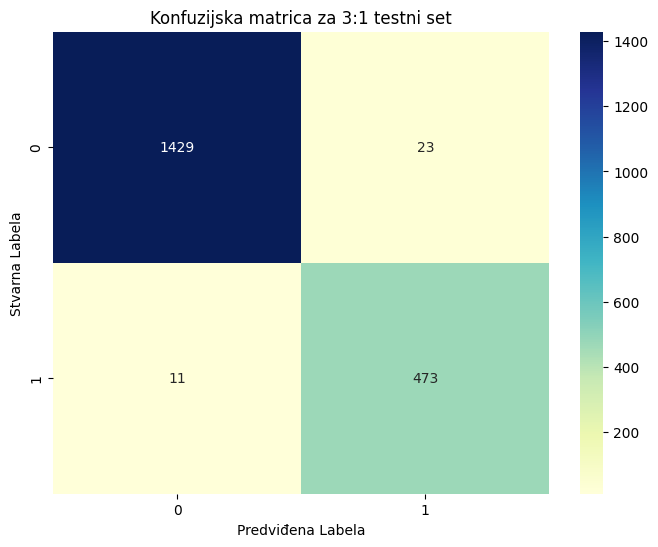

	Izvještaj Klasifikacije za 3:1 testni set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.99      0.98      0.99      1452
	       Fraud       0.95      0.98      0.97       484
	
	    accuracy                           0.98      1936
	   macro avg       0.97      0.98      0.98      1936
	weighted avg       0.98      0.98      0.98      1936
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost na 3:1 Testnom setu: 0.9952
Area Under the ROC Curve (ROC-AUC) for XGBoost na 3:1 Testnom setu: 0.9982


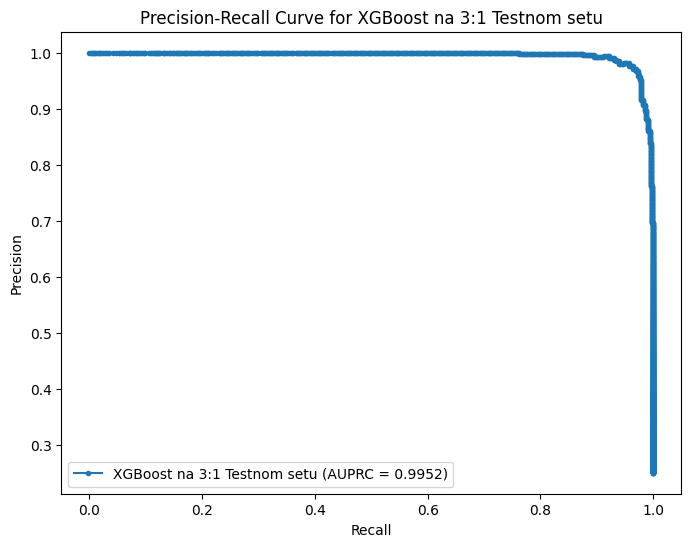

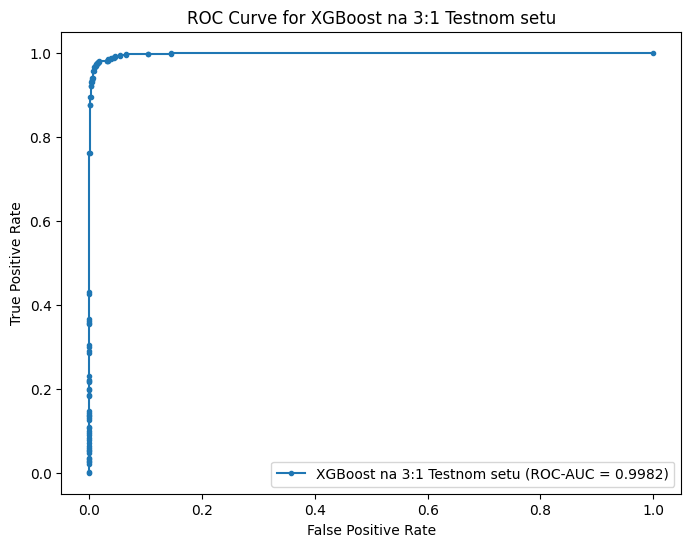

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

x_real = dfv4.drop(columns=['Class']).values
y_real = dfv4['Class'].values

# Testiranje omjera 3:1
fraud_indices = np.where(y_real == 1)[0]
non_fraud_indices = np.where(y_real == 0)[0]

num_fraud_samples = len(fraud_indices)
num_non_fraud_samples = min(3 * num_fraud_samples, len(non_fraud_indices))  # Kreiranje 3:1 seta

selected_fraud_indices = fraud_indices
selected_non_fraud_indices = np.random.choice(non_fraud_indices, num_non_fraud_samples, replace=False)

selected_indices = np.concatenate([selected_fraud_indices, selected_non_fraud_indices])
x_test_3to1 = x_real[selected_indices]
y_test_3to1 = y_real[selected_indices]

model = joblib.load("xgb_model.pkl")

# Predviđanje na 3:1 testnom setu
y_pred_3to1 = model.predict(x_test_3to1)
cnf_matrix_3to1 = confusion_matrix(y_test_3to1, y_pred_3to1)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_3to1), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za 3:1 testni set')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_test_3to1, y_pred_3to1, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za 3:1 testni set")
print(indented_classification_report)

y_probs_3to1 = model.predict_proba(x_test_3to1)[:, 1]
evaluate_and_plot_model(y_test_3to1, y_probs_3to1, 'XGBoost na 3:1 Testnom setu')


###XGB Real test na dfv4 3:1

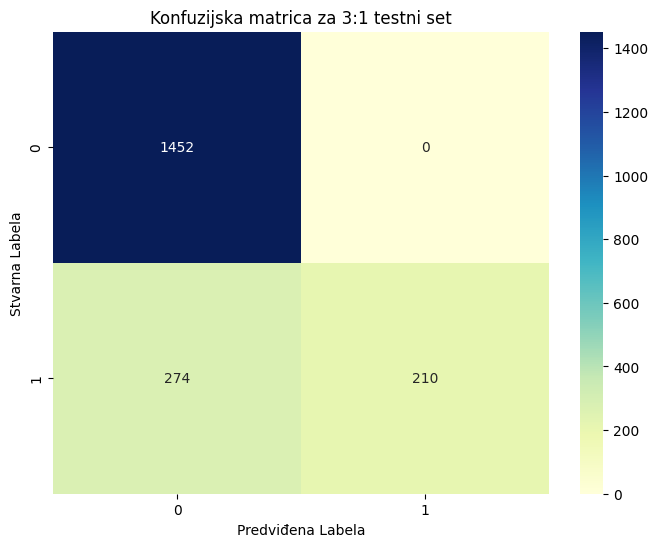

	Izvještaj Klasifikacije za 3:1 testni set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.84      1.00      0.91      1452
	       Fraud       1.00      0.43      0.61       484
	
	    accuracy                           0.86      1936
	   macro avg       0.92      0.72      0.76      1936
	weighted avg       0.88      0.86      0.84      1936
	
Area Under the Precision-Recall Curve (AUPRC) for XGBoost na 3:1 Testnom setu: 0.9626
Area Under the ROC Curve (ROC-AUC) for XGBoost na 3:1 Testnom setu: 0.9799


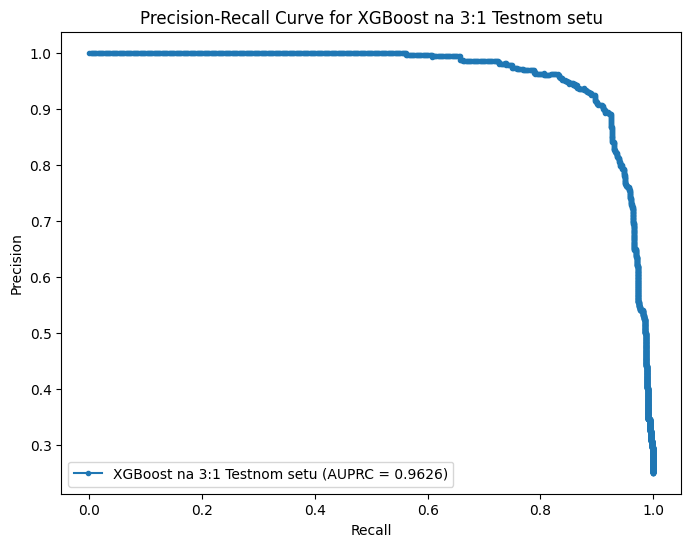

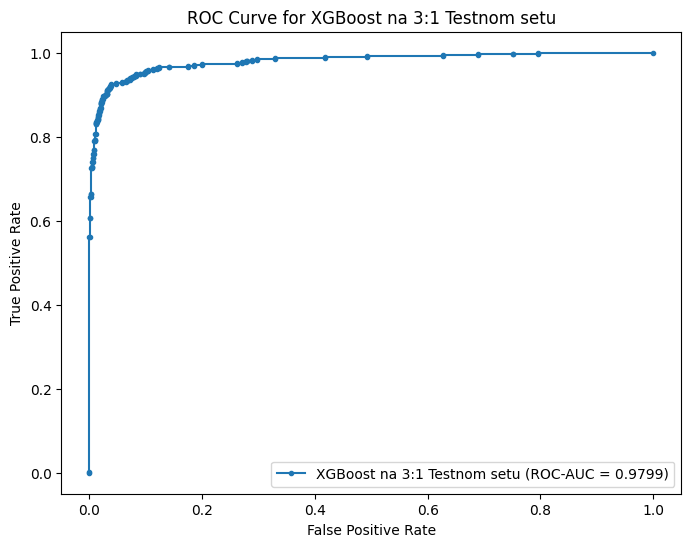

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib


x_real = dfv4.drop(columns=['Class']).values
y_real = dfv4['Class'].values

fraud_indices = np.where(y_real == 1)[0]
non_fraud_indices = np.where(y_real == 0)[0]

num_fraud_samples = len(fraud_indices)
num_non_fraud_samples = min(3 * num_fraud_samples, len(non_fraud_indices))  # Kreiranje 3:1 seta

selected_fraud_indices = fraud_indices
selected_non_fraud_indices = np.random.choice(non_fraud_indices, num_non_fraud_samples, replace=False)

selected_indices = np.concatenate([selected_fraud_indices, selected_non_fraud_indices])
x_test_3to1 = x_real[selected_indices]
y_test_3to1 = y_real[selected_indices]


model = joblib.load("xgb_realmodel.pkl")

y_pred_3to1 = model.predict(x_test_3to1)
cnf_matrix_3to1 = confusion_matrix(y_test_3to1, y_pred_3to1)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_3to1), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za 3:1 testni set')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_test_3to1, y_pred_3to1, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za 3:1 testni set")
print(indented_classification_report)

y_probs_3to1 = model.predict_proba(x_test_3to1)[:, 1]
evaluate_and_plot_model(y_test_3to1, y_probs_3to1, 'XGBoost na 3:1 Testnom setu')


##LGB

###LGB REAL


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339


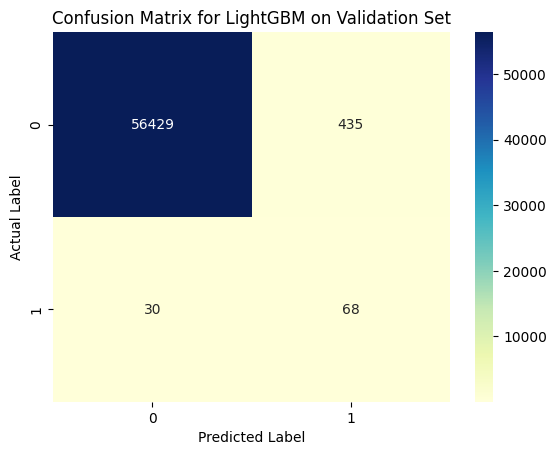

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      0.99      1.00     56864
	       Fraud       0.14      0.69      0.23        98
	
	    accuracy                           0.99     56962
	   macro avg       0.57      0.84      0.61     56962
	weighted avg       1.00      0.99      0.99     56962
	
Area Under the Precision-Recall Curve (AUPRC) for LightGBM: 0.3966
Area Under the ROC Curve (ROC-AUC) for LightGBM: 0.8003


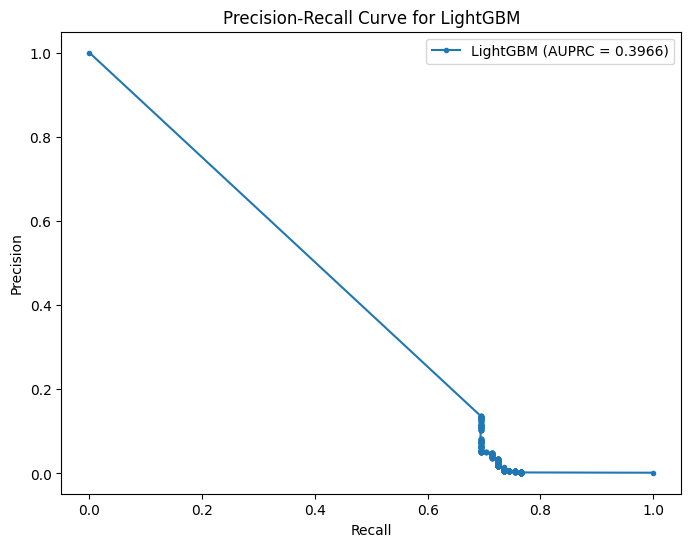

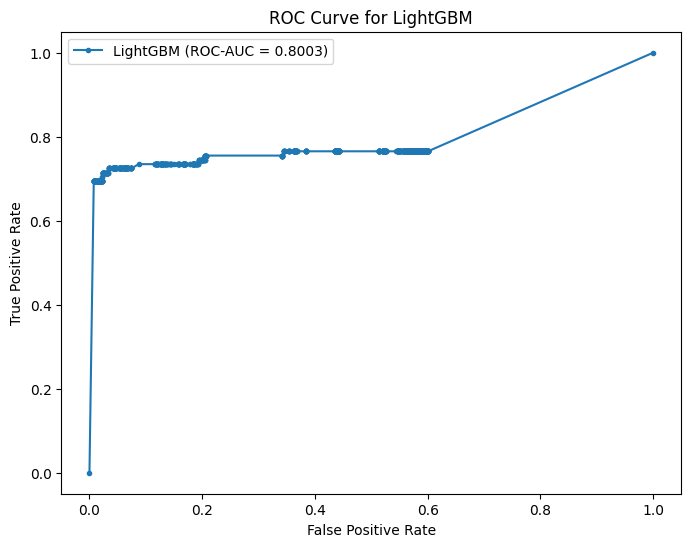

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np
import lightgbm as lgb


x = df.drop(columns=['Class']).values
y = df['Class'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)


joblib_file = "lgb_realmodel.pkl"
joblib.dump(lgb_model, joblib_file)


y_pred_lgb = lgb_model.predict(x_val)
cnf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)


sns.heatmap(pd.DataFrame(cnf_matrix_lgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za LightGBM na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i plotiranje modela
y_probs_lgb = lgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lgb, 'LightGBM')


###LGB Merged_data

[LightGBM] [Info] Number of positive: 114316, number of negative: 341375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 455691, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250863 -> initscore=-1.094015
[LightGBM] [Info] Start training from score -1.094015


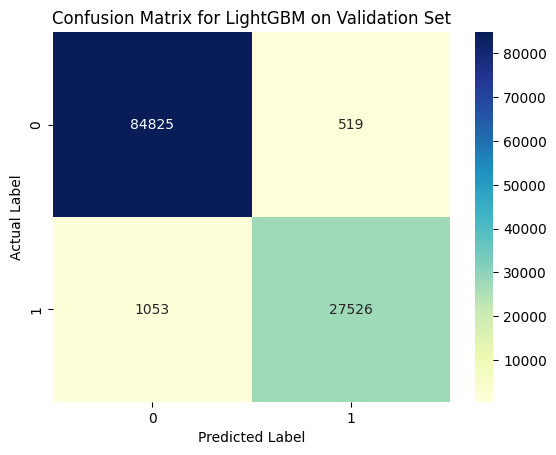

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.99      0.99      0.99     85344
	       Fraud       0.98      0.96      0.97     28579
	
	    accuracy                           0.99    113923
	   macro avg       0.98      0.98      0.98    113923
	weighted avg       0.99      0.99      0.99    113923
	
Area Under the Precision-Recall Curve (AUPRC) for LightGBM: 0.9957
Area Under the ROC Curve (ROC-AUC) for LightGBM: 0.9981


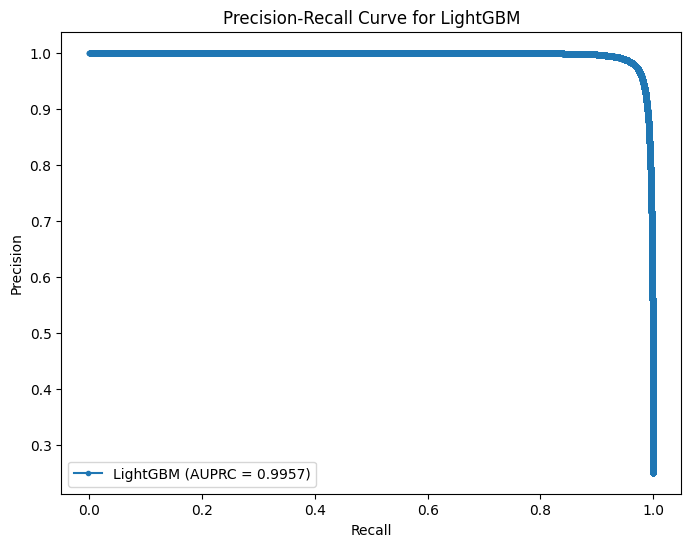

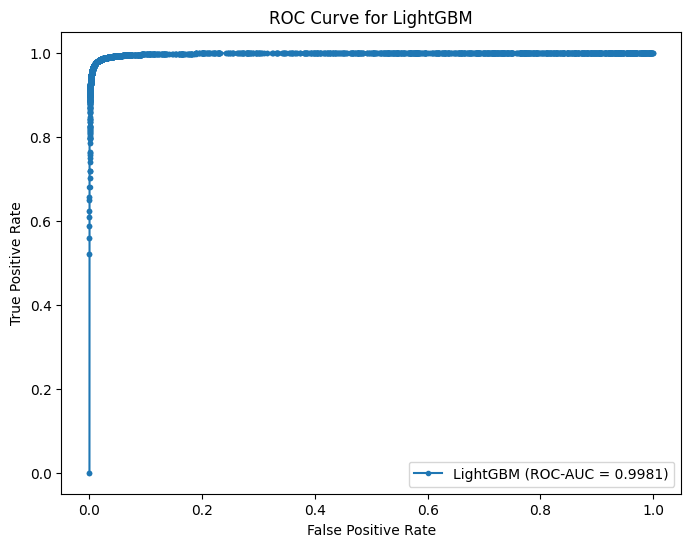

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np
import lightgbm as lgb


x = merged_data.drop(columns=['Class']).values
y = merged_data['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)


joblib_file = "lgb_model.pkl"
joblib.dump(lgb_model, joblib_file)


y_pred_lgb = lgb_model.predict(x_val)
cnf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)


sns.heatmap(pd.DataFrame(cnf_matrix_lgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za LightGBM na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i plotiranje modela
y_probs_lgb = lgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lgb, 'LightGBM')


###LGB Merged_data2

[LightGBM] [Info] Number of positive: 781, number of negative: 454910
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.169595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 455691, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001714 -> initscore=-6.367280
[LightGBM] [Info] Start training from score -6.367280


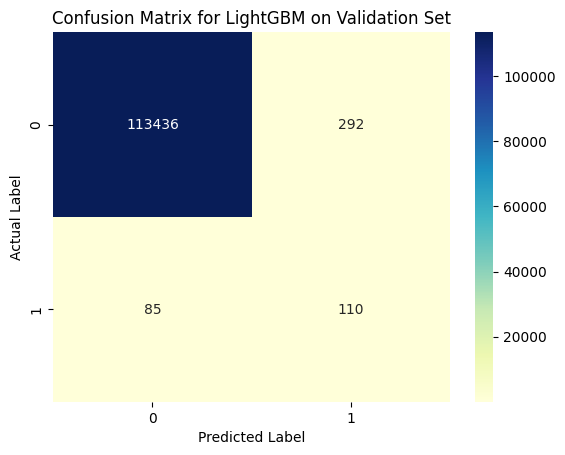

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    113728
	       Fraud       0.27      0.56      0.37       195
	
	    accuracy                           1.00    113923
	   macro avg       0.64      0.78      0.68    113923
	weighted avg       1.00      1.00      1.00    113923
	
Area Under the Precision-Recall Curve (AUPRC) for LightGBM: 0.3926
Area Under the ROC Curve (ROC-AUC) for LightGBM: 0.7451


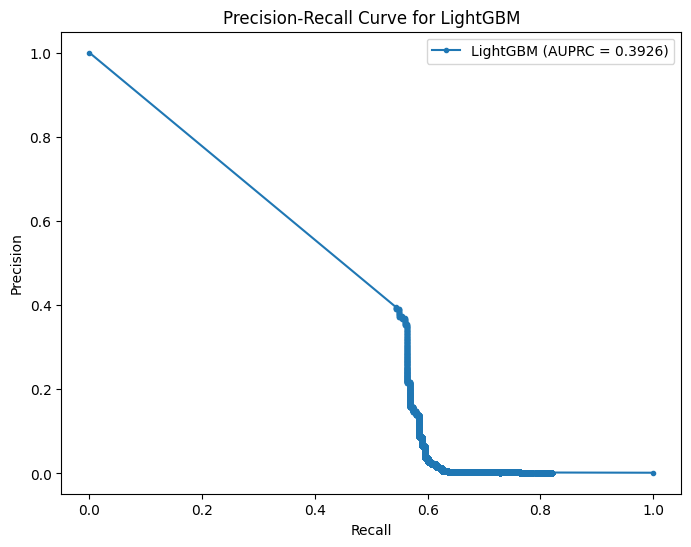

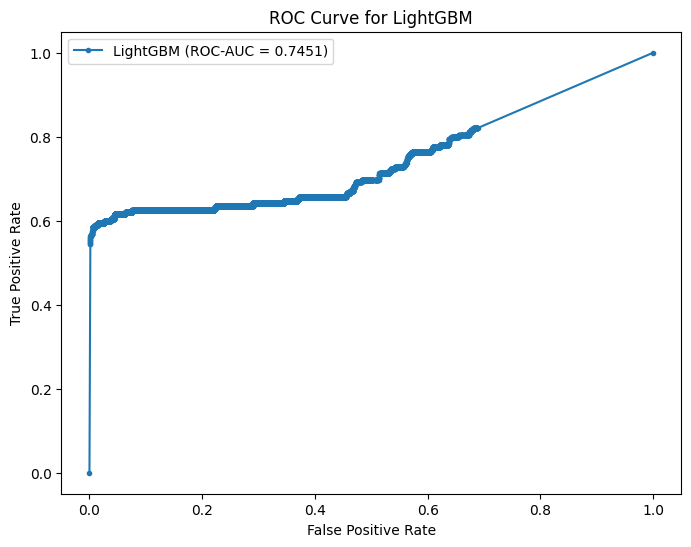

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np
import lightgbm as lgb


x = merged_data2.drop(columns=['Class']).values
y = merged_data2['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje i predikcija s LightGBM modelom
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)


joblib_file = "lgb_model2.pkl"
joblib.dump(lgb_model, joblib_file)

y_pred_lgb = lgb_model.predict(x_val)
cnf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)


sns.heatmap(pd.DataFrame(cnf_matrix_lgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za LightGBM na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

y_probs_lgb = lgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lgb, 'LightGBM')


###LGB Merged_data3

[LightGBM] [Info] Number of positive: 21106, number of negative: 434580
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 455686, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.046317 -> initscore=-3.024823
[LightGBM] [Info] Start training from score -3.024823


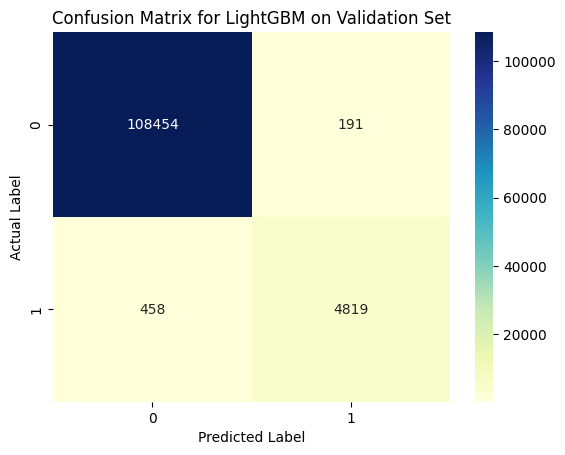

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    108645
	       Fraud       0.96      0.91      0.94      5277
	
	    accuracy                           0.99    113922
	   macro avg       0.98      0.96      0.97    113922
	weighted avg       0.99      0.99      0.99    113922
	
Area Under the Precision-Recall Curve (AUPRC) for LightGBM: 0.9768
Area Under the ROC Curve (ROC-AUC) for LightGBM: 0.9970


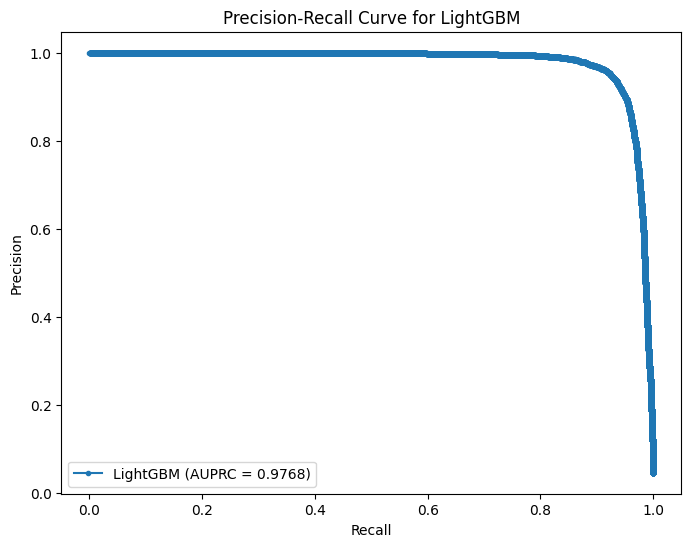

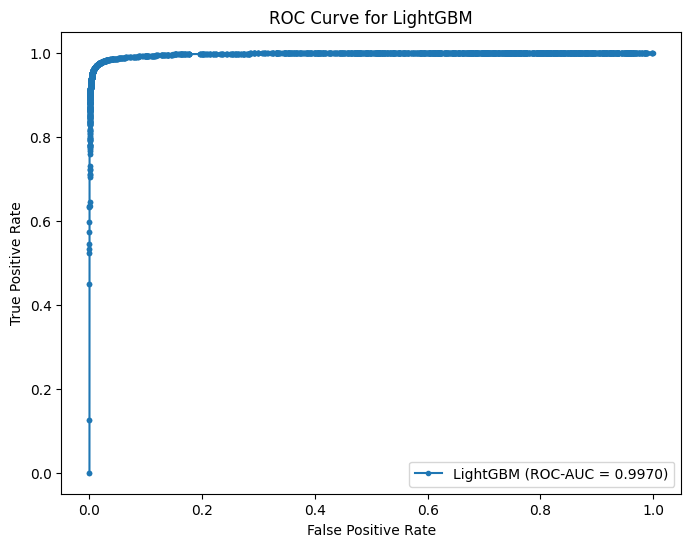

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np
import lightgbm as lgb


x = merged_data3.drop(columns=['Class']).values
y = merged_data3['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Train and predict with LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

joblib_file = "lgb_model2.pkl"
joblib.dump(lgb_model, joblib_file)


y_pred_lgb = lgb_model.predict(x_val)
cnf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)


sns.heatmap(pd.DataFrame(cnf_matrix_lgb), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna labela')
plt.xlabel('Predicted Label')
plt.title('Konfuzijska matrica for LightGBM on Validation Set')
plt.show()

labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_lgb, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tClassification Report for Validation Set")
print(indented_classification_report)


y_probs_lgb = lgb_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_lgb, 'LightGBM')


##Neural Networks

###NN Real

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


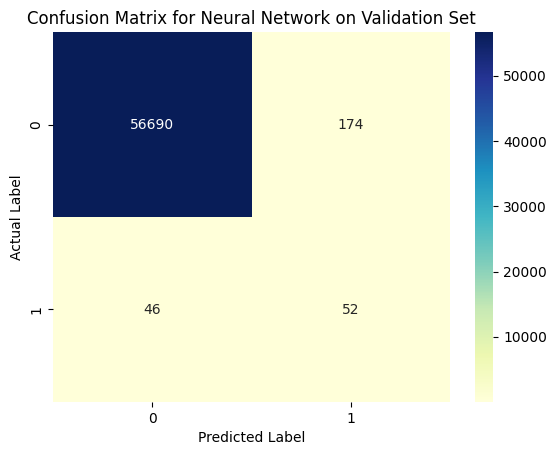

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00     56864
	       Fraud       0.23      0.53      0.32        98
	
	    accuracy                           1.00     56962
	   macro avg       0.61      0.76      0.66     56962
	weighted avg       1.00      1.00      1.00     56962
	
Area Under the Precision-Recall Curve (AUPRC) for Neural Network: 0.4834
Area Under the ROC Curve (ROC-AUC) for Neural Network: 0.8209


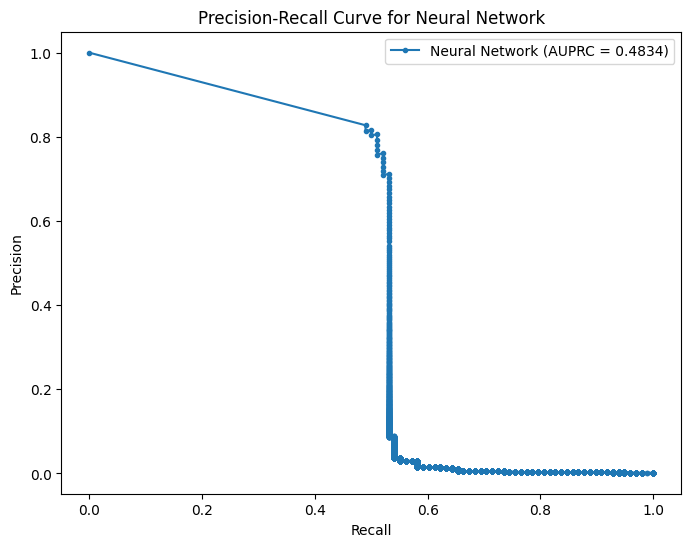

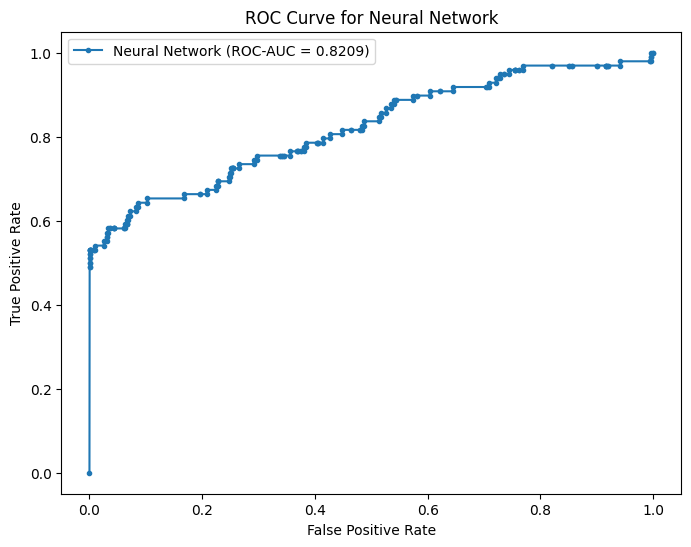

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np


x = df.drop(columns=['Class']).values
y = df['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje i predikcija s neuronskom mrežom (MLPClassifier)
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train.ravel())


joblib_file = "nn_realmodel.pkl"
joblib.dump(nn_model, joblib_file)

# Predikcija na testnom setu s učitanom neuronskom mrežom
y_pred_nn = nn_model.predict(x_val)
cnf_matrix_nn = confusion_matrix(y_val, y_pred_nn)


sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Neuronsku Mrežu na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_nn, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i grafik prikaz modela
y_probs_nn = nn_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_nn, 'Neuronska Mreža')

###NN Merged_data


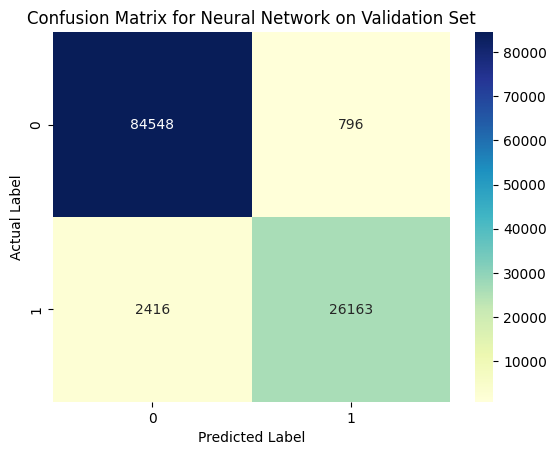

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.97      0.99      0.98     85344
	       Fraud       0.97      0.92      0.94     28579
	
	    accuracy                           0.97    113923
	   macro avg       0.97      0.95      0.96    113923
	weighted avg       0.97      0.97      0.97    113923
	
Area Under the Precision-Recall Curve (AUPRC) for Neural Network: 0.9853
Area Under the ROC Curve (ROC-AUC) for Neural Network: 0.9919


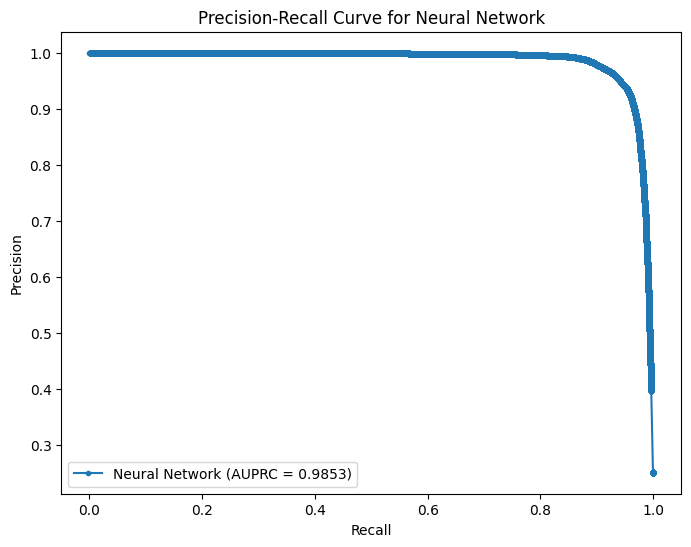

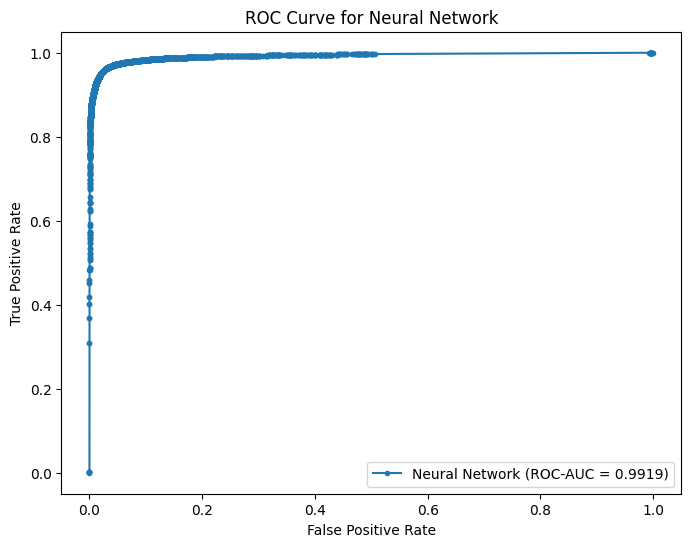

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np


x = merged_data.drop(columns=['Class']).values
y = merged_data['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje i predikcija s neuronskom mrežom (MLPClassifier)
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train.ravel())


joblib_file = "nn_model.pkl"
joblib.dump(nn_model, joblib_file)

# Predikcija na testnom setu s učitanom neuronskom mrežom
y_pred_nn = nn_model.predict(x_val)
cnf_matrix_nn = confusion_matrix(y_val, y_pred_nn)


sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Neuronsku Mrežu na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_nn, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i grafik prikaz modela
y_probs_nn = nn_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_nn, 'Neuronska Mreža')


###NN Merged_data2

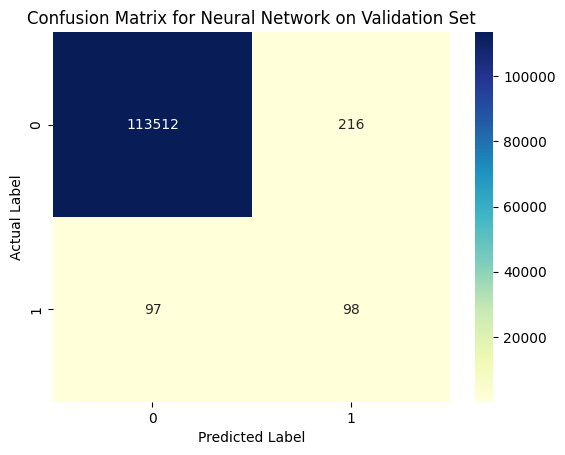

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       1.00      1.00      1.00    113728
	       Fraud       0.31      0.50      0.39       195
	
	    accuracy                           1.00    113923
	   macro avg       0.66      0.75      0.69    113923
	weighted avg       1.00      1.00      1.00    113923
	
Area Under the Precision-Recall Curve (AUPRC) for Neural Network: 0.3712
Area Under the ROC Curve (ROC-AUC) for Neural Network: 0.8698


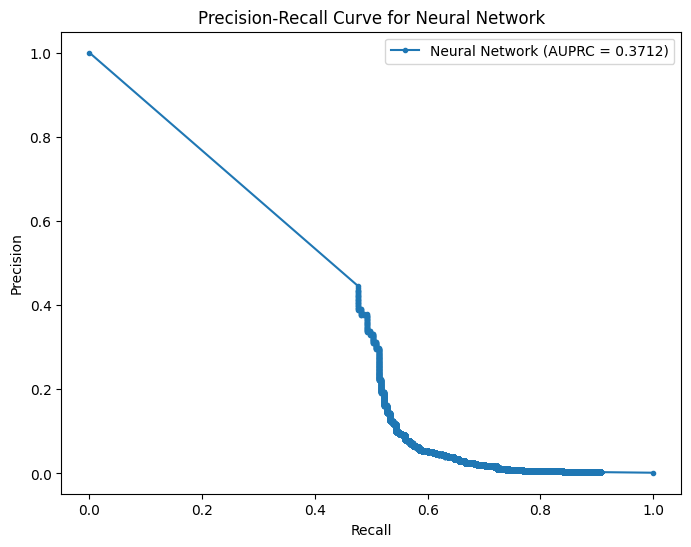

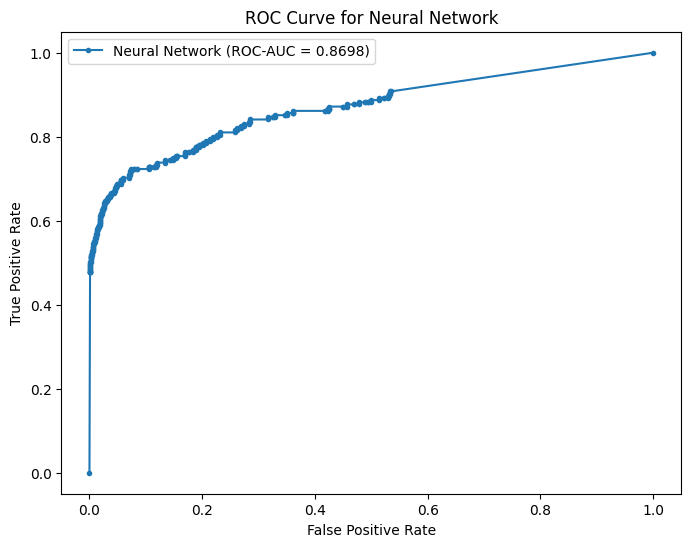

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np


x = merged_data2.drop(columns=['Class']).values
y = merged_data2['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje i predikcija s neuronskom mrežom (MLPClassifier)
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train.ravel())


joblib_file = "nn_model2.pkl"
joblib.dump(nn_model, joblib_file)

# Predikcija na testnom setu s učitanom neuronskom mrežom
y_pred_nn = nn_model.predict(x_val)
cnf_matrix_nn = confusion_matrix(y_val, y_pred_nn)


sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Neuronsku Mrežu na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_nn, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i grafik prikaz modela
y_probs_nn = nn_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_nn, 'Neuronska Mreža')

###NN Merged_data3

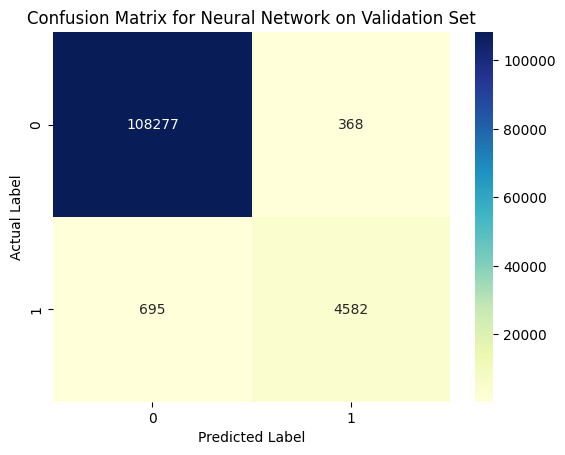

	Classification Report for Validation Set
	              precision    recall  f1-score   support
	
	   Non-fraud       0.99      1.00      1.00    108645
	       Fraud       0.93      0.87      0.90      5277
	
	    accuracy                           0.99    113922
	   macro avg       0.96      0.93      0.95    113922
	weighted avg       0.99      0.99      0.99    113922
	
Area Under the Precision-Recall Curve (AUPRC) for Neural Network: 0.9351
Area Under the ROC Curve (ROC-AUC) for Neural Network: 0.9896


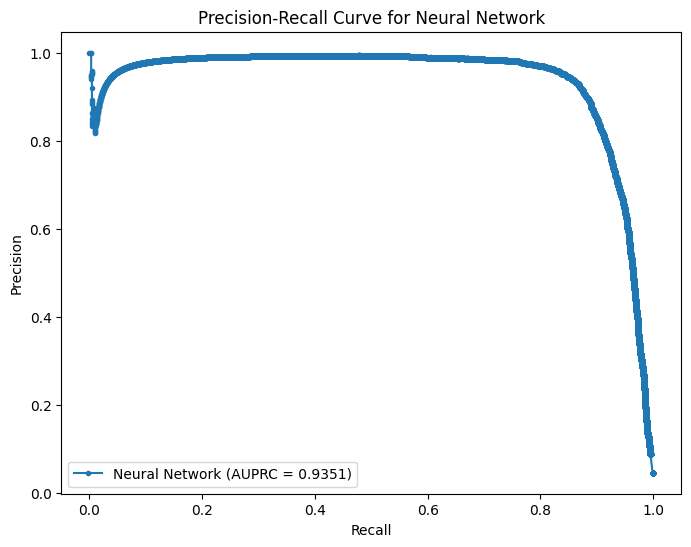

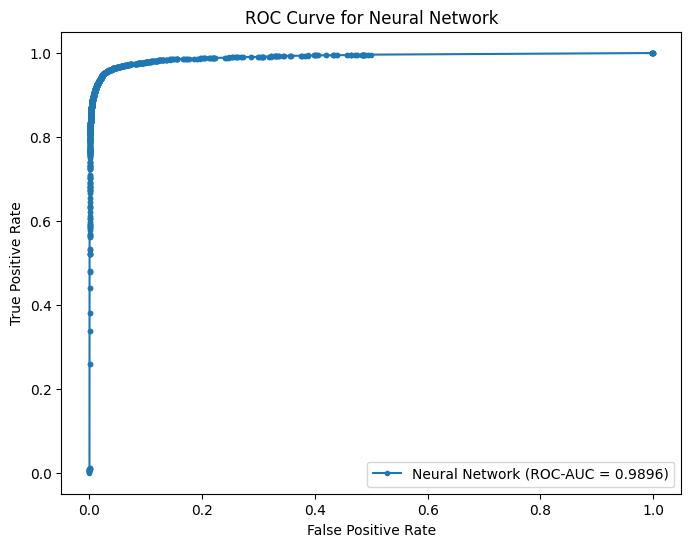

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, roc_auc_score
import numpy as np


x = merged_data3.drop(columns=['Class']).values
y = merged_data3['Class'].values


x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Treniranje i predikcija s neuronskom mrežom (MLPClassifier)
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train.ravel())


joblib_file = "nn_model3.pkl"
joblib.dump(nn_model, joblib_file)

# Predikcija na testnom setu s učitanom neuronskom mrežom
y_pred_nn = nn_model.predict(x_val)
cnf_matrix_nn = confusion_matrix(y_val, y_pred_nn)


sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Stvarna Labela')
plt.xlabel('Predviđena Labela')
plt.title('Konfuzijska matrica za Neuronsku Mrežu na testnom setu')
plt.show()


labels = ['Non-fraud', 'Fraud']
classification_report_str = classification_report(y_val, y_pred_nn, target_names=labels)
indented_classification_report = '\n'.join(['\t' + line for line in classification_report_str.split('\n')])
print("\tIzvještaj Klasifikacije za testni set")
print(indented_classification_report)

# Evaluacija i grafik prikaz modela
y_probs_nn = nn_model.predict_proba(x_val)[:, 1]
evaluate_and_plot_model(y_val, y_probs_nn, 'Neuronska Mreža')